# Figure 1 - Multiview map of pancreatic gene expression 

### Pre-requisites

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import scanpy as sc
import squidpy as sq
import anndata as ad

import matplotlib.pyplot as plt
from matplotlib import rcParams, rcdefaults


#sc.settings.set_figure_params(dpi=80, facecolor="white")

In [2]:
# Set the font globally
rcdefaults()

### Load data

In [3]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
files   = ['s1_covet_niche_def_corr_per_fov.h5ad','s2_covet_niche_def_corr_per_fov.h5ad','s3_covet_niche_def_corr_per_fov.h5ad']

s1 = sc.read_h5ad(folder+files[0])
#s1.obs["fov"] = s1.obs["fov"].astype(str) + "_s1"
s2 = sc.read_h5ad(folder+files[1])
#s2.obs["fov"] = s2.obs["fov"].astype(str) + "_s2"
s3 = sc.read_h5ad(folder+files[2])
#s3.obs["fov"] = s3.obs["fov"].astype(str) + "_s3"

adata = ad.concat([s1, s2, s3], join='outer',uns_merge='same',axis=0,pairwise=True) 
adata

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spati

In [4]:
# Median number of genes 

# 1 Calculate number of genes detected per cell 

gene_counts_per_cell = (adata.X > 0).sum(axis=1)  # Count non-zero genes per cell

# 2 Compute the Median

median_genes = np.median(gene_counts_per_cell)
print(f"The median number of genes detected per cell is: {median_genes}")

The median number of genes detected per cell is: 80.0


### Data Exploration

The anndata object is annotated with different levels of granularity:  
1. ``` 'cell_type_coarse' ``` obs field corresponds to the major pancreatic cell types identified only with the spatial gene panel.
2. ``` 'CellTypes_max' ``` obs field is the mapped annotation from npod dissociated data. The mapping task was performed using the optimal-transport-based tool [moscot](https://moscot.readthedocs.io/en/latest/notebooks/examples/problems/900_annotation_mapping.html).
3. ``` 'Niche_label' ``` obs field correspond to the niches identified using covet. 

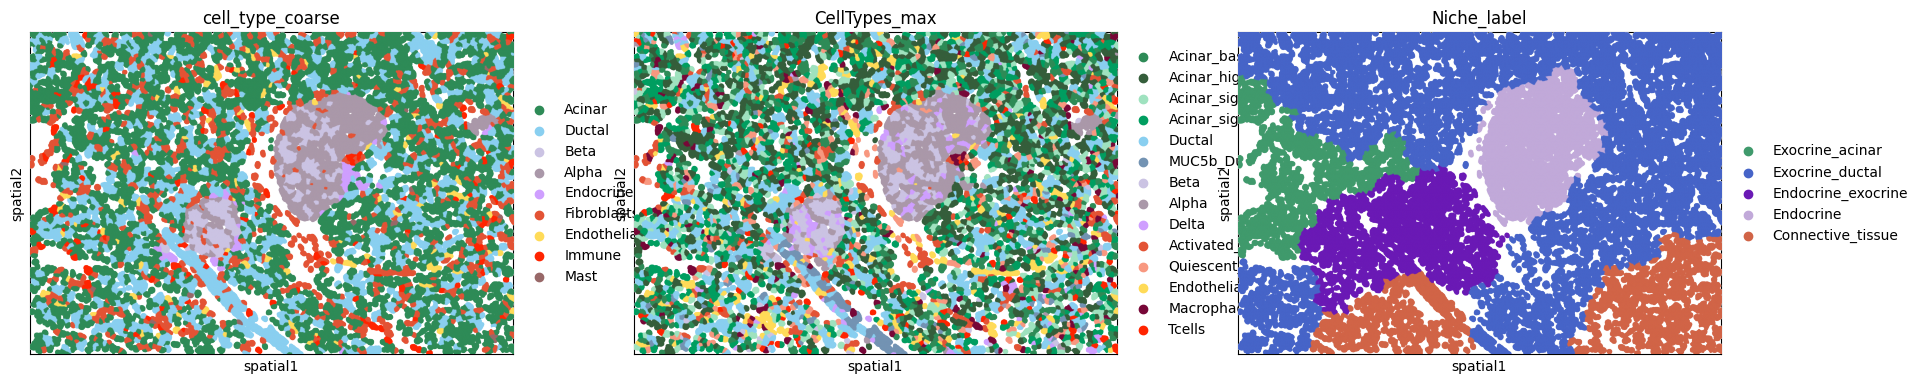

In [4]:
fovs = ['12']
for i in fovs:
    sq.pl.spatial_segment(s1,
                          color=['cell_type_coarse','CellTypes_max','Niche_label'],
                          library_id=[i],
                          library_key='fov', 
                          seg_cell_id='cell_ID',
                          img=False)

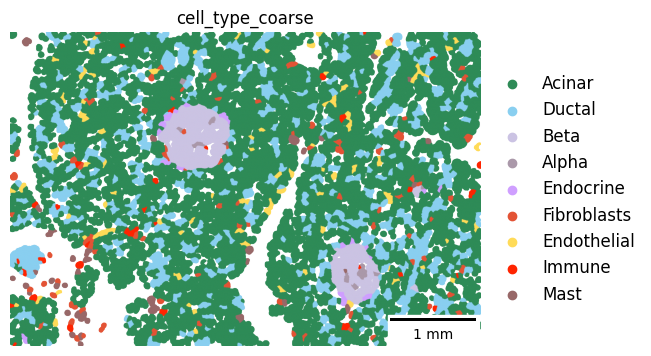

In [7]:
sq.pl.spatial_segment(s1,
                      color=['cell_type_coarse'],#,'CellTypes_max','Niche_label'],
                      library_id=['10'],
                      library_key='fov', 
                      seg_cell_id='cell_ID',
                      img=False,
                      scalebar_dx=1.0,
                      scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
                      frameon=False, wspace=0.5, legend_fontsize=12,
                      save='fov_10_cell_type_coarse.pdf')

In [4]:
x = pd.crosstab(adata.obs.Niche_label,adata.obs.CellTypes_max)
x

CellTypes_max       Acinar_basal  Acinar_highEnz  Acinar_signal  \
Niche_label                                                       
Exocrine_acinar             9383           19721           9726   
Exocrine_ductal            15298           30327          15130   
Muc5b_ductal                   6              22             12   
Endocrine_exocrine          5201            8883           4251   
Endocrine                   1339            2803           1157   
Connective_tissue           2277            3699           1990   

CellTypes_max       Acinar_sigdiff  Ductal  MUC5b_Ductal  Beta  Alpha  Delta  \
Niche_label                                                                    
Exocrine_acinar              21689   14394          2168  1730   1207    853   
Exocrine_ductal              33602   27920          5065  3996   4335   2238   
Muc5b_ductal                    23      65           295    33     15     33   
Endocrine_exocrine            9191    8293          1927  3513   3366   1529   
Endocrine                     2305    2719           409  4233   9141   2124   
Connective_tissue             3743    3087           783   806    739    515   

CellTypes_max       Activated_Stellate  Quiescent_Stellate  Endothelial  \
Niche_label                                                               
Exocrine_acinar                   4018                3803         4373   
Exocrine_ductal                   7657                6464         7644   
Muc5b_ductal                        76                  23           31   
Endocrine_exocrine                2646                2458         2772   
Endocrine                         1161                1031          905   
Connective_tissue                 1654                1271         1443   

CellTypes_max       Macrophage  Tcells  
Niche_label                             
Exocrine_acinar           3432    2230  
Exocrine_ductal           9710    4756  
Muc5b_ductal                48       9  
Endocrine_exocrine        2108    1822  
Endocrine                  770     503  
Connective_tissue         1398    1202

### Canonical marker genes in spatial data set

In [7]:
markers = {
    'Acinar_basal' : 'REG1A', 
    'Acinar_highEnz': 'PRSS2', # not present in spatial gene panel 
    'Acinar_signal': 'MT1X',
    'Acinar_sigdiff' : 'SOD2', 
    'Ductal':'KRT19', # not present in spatial gene panel 
    #'MUC5b_Ductal':'MUC5B', # not present in spatial gene panel 
    'Beta':['INS','IAPP'], 
    'Alpha':['GCG','TTR'], 
    'Delta':'SST',
    'Activated_Stellate':'COL6A3', 
    'Quiescent_Stellate':'SPARCL1',    
    'Endothelial':'PECAM1',  # not present in spatial gene panel 
    #'LymphEndo':'FLT4', # gone after dissociated data filtering
    'Macrophage':'C1QB', 
    'Tcells':'CD2',
    #'Schwann':'CDH19',# gone after dissociated data filtering
    #'Mast':'KIT', # gone after dissociated data filtering
    #'Bcells':'CD53', # gone after dissociated data filtering
}

In [50]:
markers_list = ['REG1A', 'PRSS2', 'MT1X', 'SOD2','SPP1','KRT19', 'AGR2','DMBT1','INS', 'IAPP', 'GCG', 'TTR', 'SST', 'COL6A3', 'SPARCL1', 'PECAM1', 'C1QB', 'CD2','CPA3','TPSAB1']

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'nor

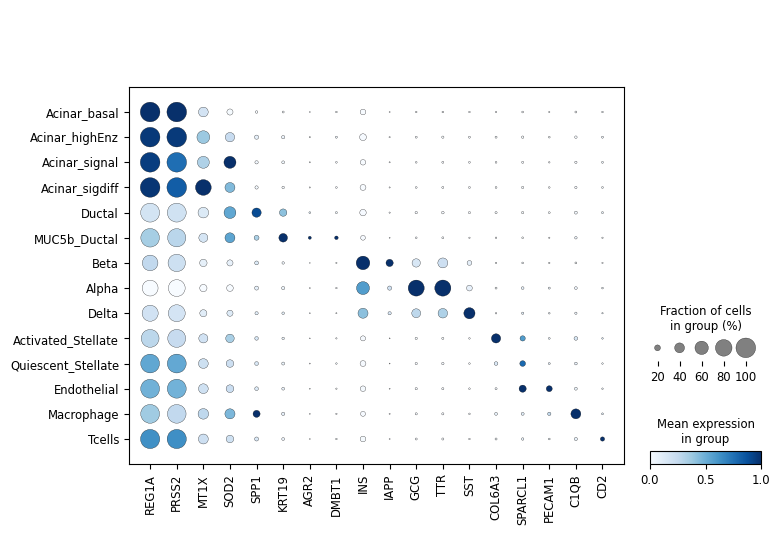

In [48]:
sc.pl.dotplot(adata, 
              markers_list, 
              groupby='CellTypes_max', 
              dendrogram=False,
              cmap='Blues',
              standard_scale='var',
              save='canonical_genes.pdf')

In [59]:
markers_list = ['CPB1','PRSS2','SOX9','SPP1','INS', 'IAPP','G6PC2','GCG', 'TTR','GC','CHGA','SCG5','SST','COL6A3','COL3A1','PECAM1','VWF','CD74','CD163','CPA3','TPSAB1']

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'nor

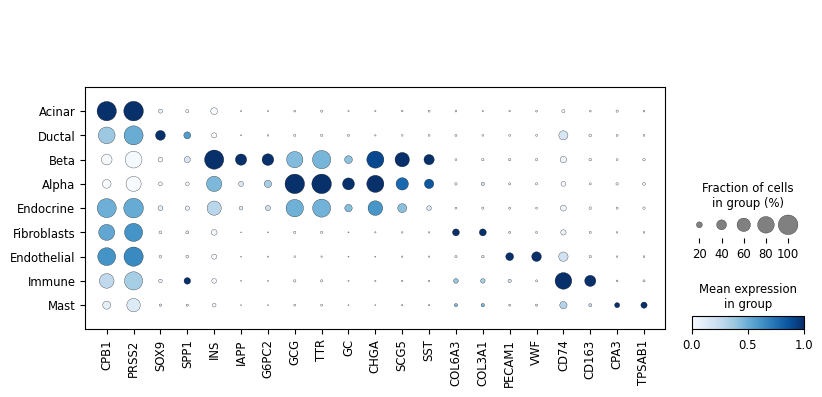

In [60]:
sc.pl.dotplot(adata, 
              markers_list, 
              groupby='cell_type_coarse', 
              dendrogram=False,
              cmap='Blues',
              standard_scale='var',
              save='canonical_genes_cell_type_coarse.pdf')

### Cell type distributions of immunofluorescence markers 

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:8

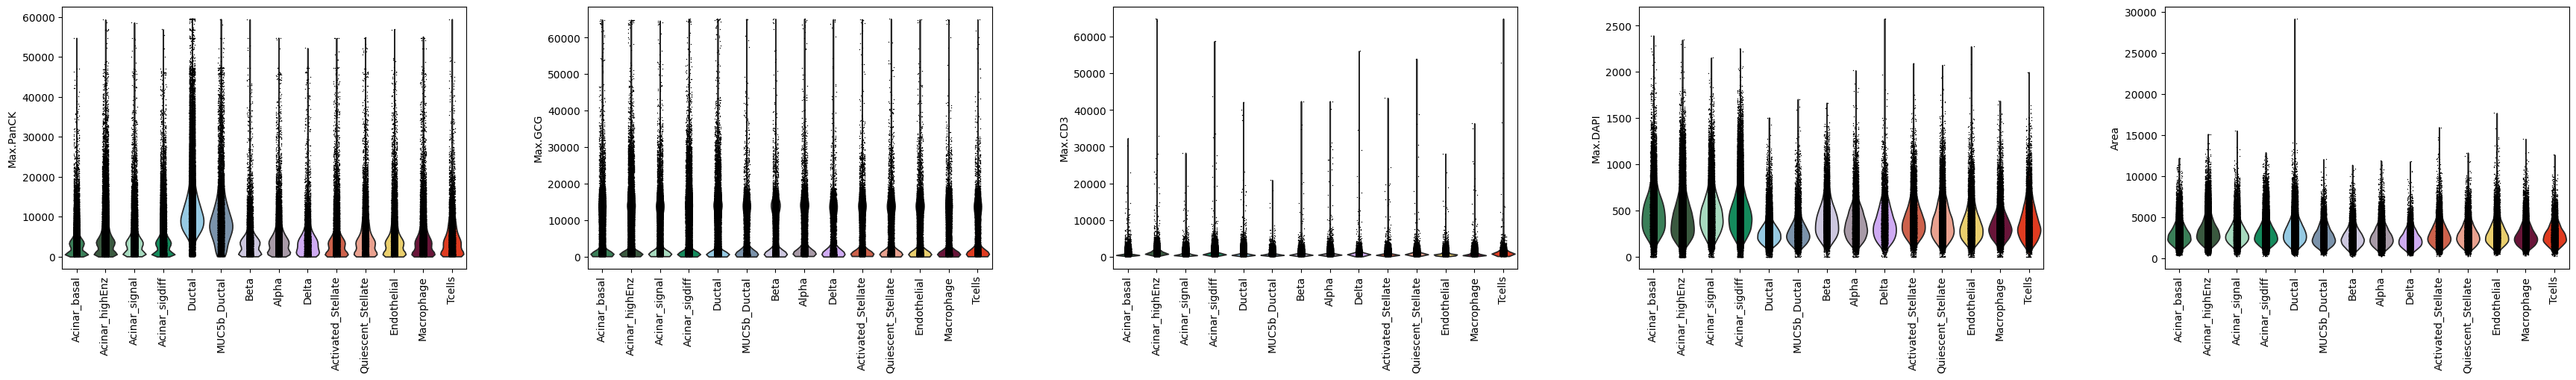

In [65]:
if_markers = ['Max.PanCK', 'Max.GCG', 'Max.CD3', 'Max.DAPI', 'Area']
sc.pl.violin(adata, keys=if_markers, groupby='CellTypes_max',rotation=90)

### Sankey plot to visualize the relationship between 'cell_type_coarse' and 'CellTypes_max'

In [ ]:
!pip install plotly

In [8]:
import plotly.graph_objects as go

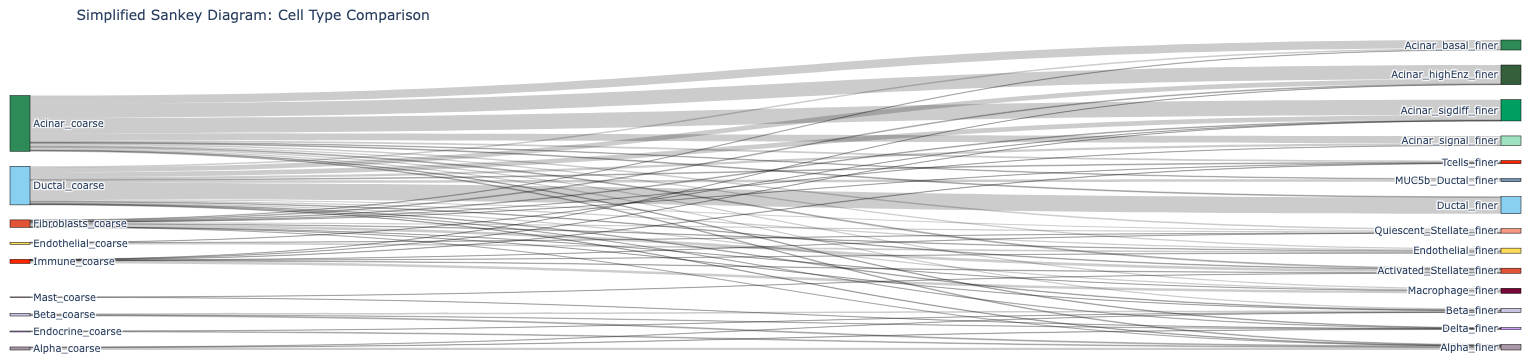

In [9]:
# Extract the categories and ensure they are strings
source_categories = adata.obs['cell_type_coarse'].astype(str)
target_categories = adata.obs['CellTypes_max'].astype(str)

# Treat repeated names as unique by appending a suffix
source_categories = source_categories + "_coarse"
target_categories = target_categories + "_finer"

# Create a DataFrame for aggregation
df = pd.DataFrame({
    "Source": source_categories,
    "Target": target_categories
})

# Count occurrences of each Source-Target combination
counts = df.groupby(["Source", "Target"]).size().reset_index(name="Count")

# Filter connections based on a threshold (median value)
#threshold = counts["Count"].quantile(0.75)
threshold = counts["Count"].median()
filtered_counts = counts[counts["Count"] >= threshold]

# Prepare data for the Sankey plot
source_labels = filtered_counts["Source"].unique()
target_labels = filtered_counts["Target"].unique()
all_labels = list(source_labels) + list(target_labels)
label_indices = {label: i for i, label in enumerate(all_labels)}

sources = filtered_counts["Source"].map(label_indices)
targets = filtered_counts["Target"].map(label_indices)
values = filtered_counts["Count"]

# Get colors for the nodes
source_unique_categories = adata.obs['cell_type_coarse'].cat.categories
target_unique_categories = adata.obs['CellTypes_max'].cat.categories

# Extract colors from `adata.uns`
source_colors = dict(zip(source_unique_categories, adata.uns['cell_type_coarse_colors']))
target_colors = dict(zip(target_unique_categories, adata.uns['CellTypes_max_colors']))

# Map colors to all labels
node_colors = []
for label in all_labels:
    if "_coarse" in label:
        base_label = label.replace("_coarse", "")
        node_colors.append(source_colors.get(base_label, "gray"))  # Default to gray if missing
    elif "_finer" in label:
        base_label = label.replace("_finer", "")
        node_colors.append(target_colors.get(base_label, "gray"))  # Default to gray if missing

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(
    title_text="Simplified Sankey Diagram: Cell Type Comparison",
    font_size=10,
    height=800,  # Increase height for vertical extension
    margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins
    legend=dict(
        x=1.05,  # Position the legend to the right of the plot
        y=1,     # Align it to the top
        borderwidth=1
    )
)

fig.show()

In [108]:
!pip install -U kaleido

In [114]:
pip install -U plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
fig.write_image("figures/sankey_diagram.pdf", format="pdf")

### Neighbors enrichment

In [7]:
adata.obs['fov_unique'] = adata.obs.fov.astype(str) + '_' + adata.obs.slide.astype(str)
adata.obs.fov_unique.unique()

array(['1_Run5211_S1', '2_Run5211_S1', '3_Run5211_S1', '4_Run5211_S1',
       '5_Run5211_S1', '6_Run5211_S1', '7_Run5211_S1', '8_Run5211_S1',
       '9_Run5211_S1', '10_Run5211_S1', '11_Run5211_S1', '12_Run5211_S1',
       '13_Run5211_S1', '14_Run5211_S1', '15_Run5211_S1', '16_Run5211_S1',
       '17_Run5211_S1', '18_Run5211_S1', '19_Run5211_S1', '20_Run5211_S1',
       '21_Run5211_S1', '22_Run5211_S1', '23_Run5211_S1', '24_Run5211_S1',
       '1_Run5211_S2', '2_Run5211_S2', '3_Run5211_S2', '4_Run5211_S2',
       '5_Run5211_S2', '6_Run5211_S2', '7_Run5211_S2', '8_Run5211_S2',
       '9_Run5211_S2', '10_Run5211_S2', '11_Run5211_S2', '12_Run5211_S2',
       '13_Run5211_S2', '14_Run5211_S2', '15_Run5211_S2', '16_Run5211_S2',
       '17_Run5211_S2', '18_Run5211_S2', '19_Run5211_S2', '20_Run5211_S2',
       '21_Run5211_S2', '22_Run5211_S2', '1_Run5211_S3', '2_Run5211_S3',
       '3_Run5211_S3', '4_Run5211_S3', '5_Run5211_S3', '6_Run5211_S3',
       '7_Run5211_S3', '8_Run5211_S3', '9_Run5211

In [8]:
adata.obs['fov_unique'] = adata.obs['fov_unique'].astype('category')

In [9]:
sq.gr.spatial_neighbors(adata, spatial_key='spatial',library_key='fov_unique',n_neighs=30)#,delaunay=True)
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat

In [19]:
adata_nd = adata[adata.obs.condition == "ND"].copy()
adata_t1 = adata[adata.obs.condition == "T1D"].copy()

adata_nd.obs_names_make_unique
adata_t1.obs_names_make_unique

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 225288 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30'

In [20]:
sq.gr.nhood_enrichment(adata_nd, cluster_key="CellTypes_max")


100%|██████████| 1000/1000 [00:14<00:00, 71.28/s][A


In [21]:
sq.gr.nhood_enrichment(adata_t1, cluster_key="CellTypes_max")


100%|██████████| 1000/1000 [00:18<00:00, 54.35/s][A


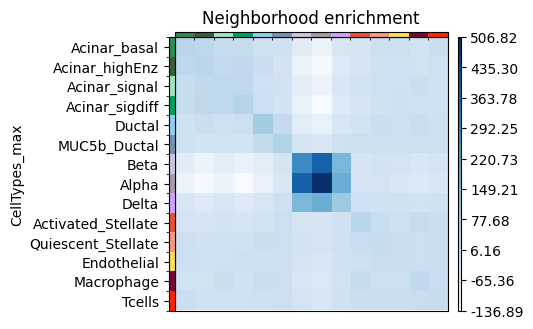

In [22]:
sq.pl.nhood_enrichment(
    adata_nd,
    cluster_key="CellTypes_max",
    cmap='Blues',
    figsize=(3, 3),
    save='nhood_enrichment_ND.pdf'
)

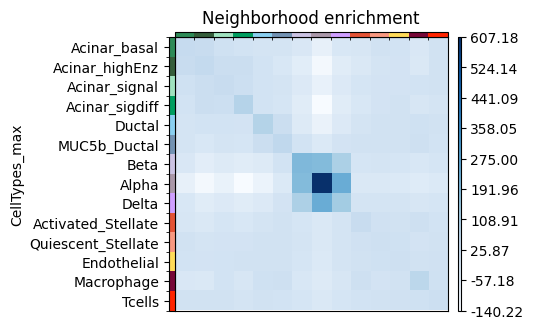

In [23]:
sq.pl.nhood_enrichment(
    adata_t1,
    cluster_key="CellTypes_max",
    cmap='Blues',
    figsize=(3, 3),
    save='nhood_enrichment_T1D.pdf'
)

### Spatially variable genes through Moran's I score and visualization grupped by niche label

In [33]:
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat

In [11]:
df_svg = sq.gr.spatial_autocorr(adata,
                                mode="moran",
                                n_perms=100,
                                n_jobs=4,
                                seed=0,
                                copy=True
                               )
adata


100%|██████████| 100/100 [56:48<00:00, 34.09s/]


AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat

In [14]:
df_svg.to_csv('spatially_variable_genes.tsv', sep='\t', index=True)

In [36]:
df_svg.head(30)

I  pval_norm      var_norm  pval_z_sim  pval_sim  \
INS       0.654969        0.0  2.185952e-07         0.0  0.009901   
GCG       0.650099        0.0  2.185952e-07         0.0  0.009901   
TTR       0.648585        0.0  2.185952e-07         0.0  0.009901   
TYK2      0.575398        0.0  2.185952e-07         0.0  0.009901   
HSPA1A    0.532415        0.0  2.185952e-07         0.0  0.009901   
CHGA      0.506952        0.0  2.185952e-07         0.0  0.009901   
CPB1      0.466926        0.0  2.185952e-07         0.0  0.009901   
PRSS2     0.463238        0.0  2.185952e-07         0.0  0.009901   
MT2A      0.430890        0.0  2.185952e-07         0.0  0.009901   
REG1A     0.375833        0.0  2.185952e-07         0.0  0.009901   
SERPINA3  0.356098        0.0  2.185952e-07         0.0  0.009901   
IAPP      0.331336        0.0  2.185952e-07         0.0  0.009901   
MALAT1    0.325157        0.0  2.185952e-07         0.0  0.009901   
HLA-A     0.311855        0.0  2.185952e-07         0.0  0.009901   
SOD2      0.301076        0.0  2.185952e-07         0.0  0.009901   
MT1X      0.294873        0.0  2.185952e-07         0.0  0.009901   
SPINK1    0.273804        0.0  2.185952e-07         0.0  0.009901   
B2M       0.273280        0.0  2.185952e-07         0.0  0.009901   
CUZD1     0.264396        0.0  2.185952e-07         0.0  0.009901   
SST       0.239936        0.0  2.185952e-07         0.0  0.009901   
MEG3      0.227076        0.0  2.185952e-07         0.0  0.009901   
OLFM4     0.204617        0.0  2.185952e-07         0.0  0.009901   
MZT2A     0.199870        0.0  2.185952e-07         0.0  0.009901   
CD74      0.198031        0.0  2.185952e-07         0.0  0.009901   
HLA-B     0.193855        0.0  2.185952e-07         0.0  0.009901   
SCG5      0.189171        0.0  2.185952e-07         0.0  0.009901   
HSPB1     0.180732        0.0  2.185952e-07         0.0  0.009901   
HLA-C     0.178888        0.0  2.185952e-07         0.0  0.009901   
SERPINA1  0.178566        0.0  2.185952e-07         0.0  0.009901   
COL1A1    0.171489        0.0  2.185952e-07         0.0  0.009901   

               var_sim  pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
INS       1.854434e-06               0.0                0.0         0.010445  
GCG       1.520245e-06               0.0                0.0         0.010445  
TTR       1.472042e-06               0.0                0.0         0.010445  
TYK2      1.432760e-06               0.0                0.0         0.010445  
HSPA1A    1.271463e-06               0.0                0.0         0.010445  
CHGA      1.132725e-06               0.0                0.0         0.010445  
CPB1      1.182037e-06               0.0                0.0         0.010445  
PRSS2     1.241895e-06               0.0                0.0         0.010445  
MT2A      1.269682e-06               0.0                0.0         0.010445  
REG1A     1.066611e-06               0.0                0.0         0.010445  
SERPINA3  7.843096e-07               0.0                0.0         0.010445  
IAPP      8.947132e-07               0.0                0.0         0.010445  
MALAT1    7.442516e-07               0.0                0.0         0.010445  
HLA-A     7.648911e-07               0.0                0.0         0.010445  
SOD2      7.679993e-07               0.0                0.0         0.010445  
MT1X      9.113320e-07               0.0                0.0         0.010445  
SPINK1    7.862996e-07               0.0                0.0         0.010445  
B2M       8.201858e-07               0.0                0.0         0.010445  
CUZD1     8.103415e-07               0.0                0.0         0.010445  
SST       4.942574e-07               0.0                0.0         0.010445  
MEG3      7.832329e-07               0.0                0.0         0.010445  
OLFM4     5.968655e-07               0.0                0.0         0.010445  
MZT2A     6.599006e-07               0.0                0.0 

In [39]:
niche_mapping = {
    'Exocrine_acinar': 'Acinar-enriched',
    'Exocrine_ductal': 'Ductal-enriched',
    'Muc5b_ductal': 'Muc5b Ductal-enriched',
    'Endocrine_exocrine': 'Endo-Exo',
    'Endocrine': 'Endocrine',
    'Connective_tissue': 'Connective cells'
}

# Ensure 'Niche_label' is a categorical field
if adata.obs['Niche_label'].dtype.name == 'category':
    adata.obs['Niche_label'] = adata.obs['Niche_label'].cat.rename_categories(niche_mapping)
else:
    # Convert to categorical before renaming
    adata.obs['Niche_label'] = adata.obs['Niche_label'].astype('category')
    adata.obs['Niche_label'] = adata.obs['Niche_label'].cat.rename_categories(niche_mapping)

In [41]:
svg_to_plot = ['TYK2','CPB1', 'PRSS2','REG1A','SERPINA3','SPINK1','CUZD1','MT1X','SOD2','MT2A',
               'HSPA1A','HLA-A','B2M','INS', 'GCG', 'TTR','CHGA','IAPP','SST']

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


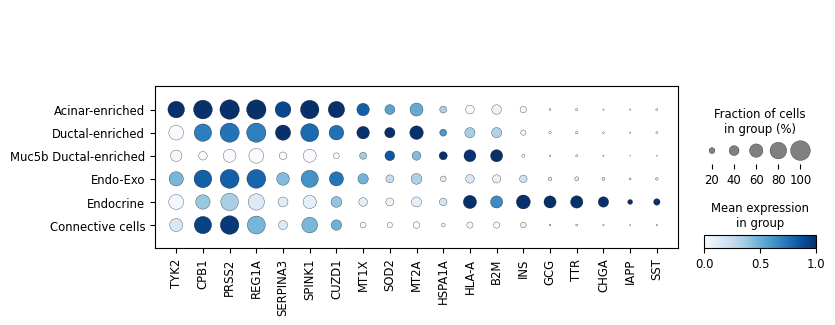

In [43]:
sc.pl.dotplot(adata, 
              svg_to_plot, 
              groupby='Niche_label', 
              dendrogram=False,
              cmap='Blues',
              standard_scale='var',
              save='spatially_variable_genes_niche_label.pdf')

### Cell type diversity per niche

/tmp/ipykernel_3527324/2114041684.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = adata.obs.groupby(['Niche_label', 'CellTypes_max']).size().unstack(fill_value=0)


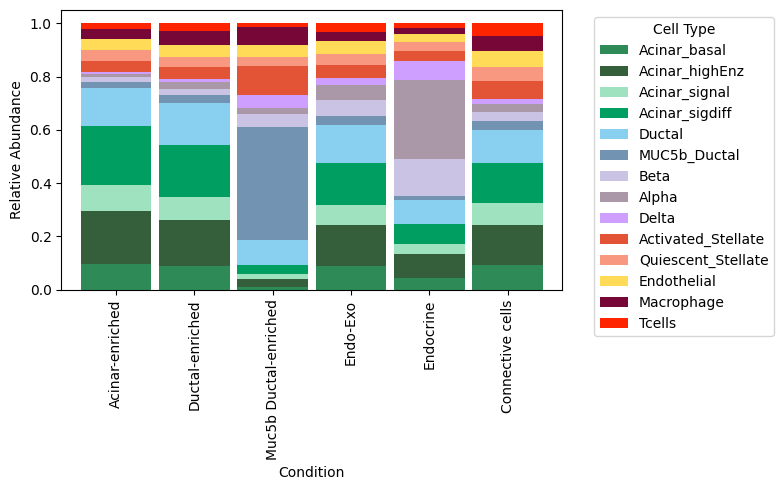

In [51]:
# Step 1: Group observations by 'condition' and count each 'CellTypes_max' entry
counts = adata.obs.groupby(['Niche_label', 'CellTypes_max']).size().unstack(fill_value=0)

# Step 2: Calculate relative abundance (proportion) by normalizing counts within each condition
relative_abundance = counts.div(counts.sum(axis=1), axis=0)

colors = adata.uns['CellTypes_max_colors']

# Step 3: Plot stacked bar plot
relative_abundance.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5),width=0.9)

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Relative Abundance')
#plt.title('Relative Abundance of Cell Types by Condition')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/ct_relative_abundance_per_niche.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Cell type diversity per condition

/tmp/ipykernel_3527324/2872348559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = adata.obs.groupby(['condition', 'Niche_label']).size().unstack(fill_value=0)


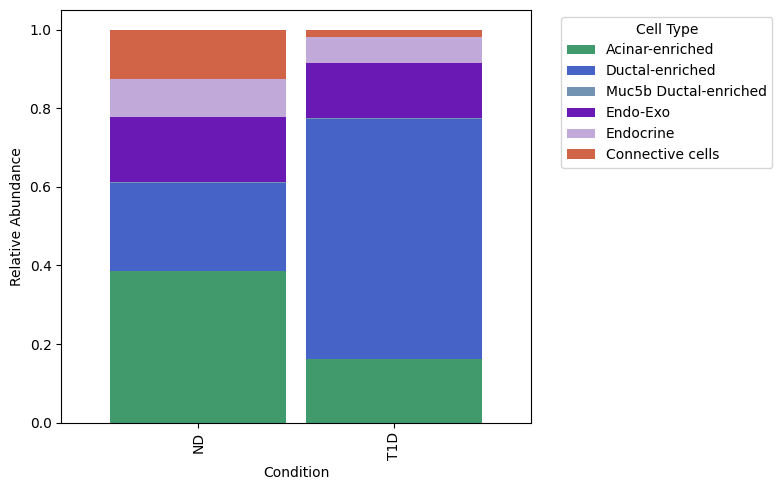

In [53]:
# Step 1: Group observations by 'condition' and count each 'CellTypes_max' entry
counts = adata.obs.groupby(['condition', 'Niche_label']).size().unstack(fill_value=0)

# Step 2: Calculate relative abundance (proportion) by normalizing counts within each condition
relative_abundance = counts.div(counts.sum(axis=1), axis=0)

colors = adata.uns['Niche_label_colors']

# Step 3: Plot stacked bar plot
relative_abundance.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5),width=0.9)

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Relative Abundance')
#plt.title('Relative Abundance of Cell Types by Condition')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/niche_relative_abundance_per_condition.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Spatial graph analysis from GraphCompass results 

In [7]:
del adata_gc